In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [104]:
run_folder = "results/simu_0006"

edge_infos = sorted([f for f in os.listdir(run_folder) if "edge_info" in f], key=lambda x: int(x.split('_')[0]))
vehicle_infos = sorted([f for f in os.listdir(run_folder) if "vehicle_info" in f], key=lambda x: int(x.split('_')[0]))
road_infos = sorted([f for f in os.listdir(run_folder) if "road_info" in f], key=lambda x: int(x.split('_')[0]))

# Road Analysis

In [105]:
road_df = pd.DataFrame(columns=["edge"]+[i+1 for i in range(len(road_infos))])

In [106]:
number_of_requests = []
for i, road_info_name in enumerate(road_infos):
    n = int(road_info_name.split("_")[0])
    ri_df = pd.read_csv(os.path.join(run_folder, road_info_name))
    #do this only once I guess??
    road_df["edge"] = ri_df["edge"]
    number_of_requests += [n+19]
    sum_rows = ri_df[ri_df.columns[2:]].sum(axis=1).astype(int)
    road_df[n] = sum_rows


In [107]:

road_df

,edge,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,42435660-42436551,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,1,0,0,0
1,42435660-42430872,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,42435660-596776041,0,1,0,0,0,1,0,0,0,...,0,1,1,1,1,0,1,0,0,1
3,42435660-42430375,0,0,1,1,1,5,0,5,0,...,1,1,1,1,4,5,1,0,5,2
4,42436551-42430872,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,42445256-42430872,0,2,0,1,1,2,2,2,0,...,2,2,1,0,0,1,2,0,0,2
300,42430707-42435660,0,0,1,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
301,42430707-42436551,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
302,42430707-42430872,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


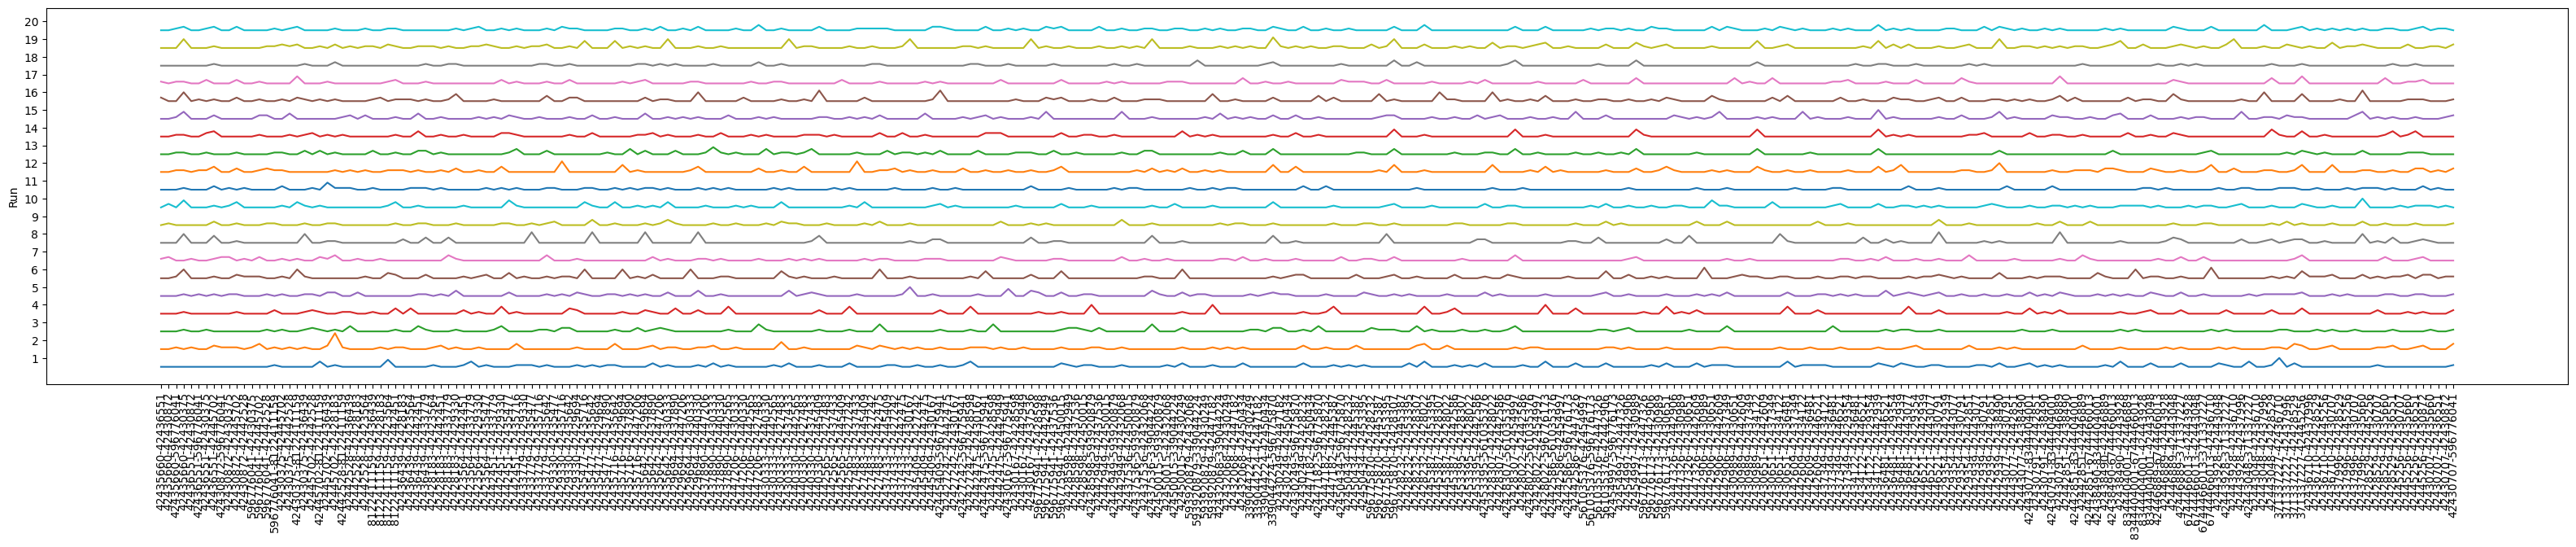

In [108]:
plt.figure(figsize=(40, 6))
max_value = road_df.drop("edge", inplace=False, axis=1).values.max()+1
for i, col in enumerate(road_df.columns[1:]):
    # Add an offset to each series
    offset = max_value * i
    plt.plot(road_df['edge'], road_df[col] + offset, label=col)

# Set ticks and labels for y-axis
plt.yticks([max_value * i + max_value / 2 for i in range(len(road_df.columns[1:]))], road_df.columns[1:])
plt.ylabel('Run')
plt.xticks(rotation='vertical')
#plt.legend()
plt.grid(False)
plt.show()

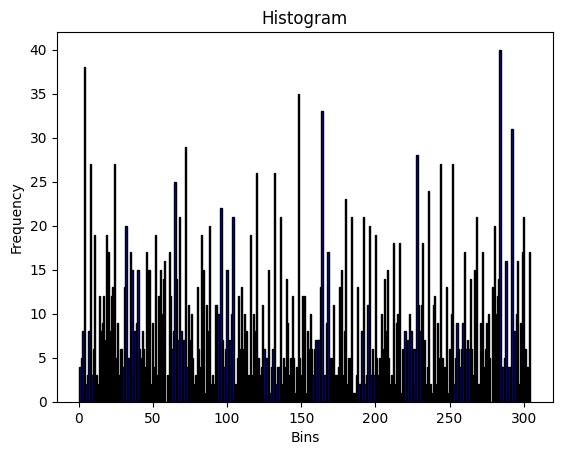

In [112]:
import matplotlib.pyplot as plt


y_values = list(road_df[road_df.columns[1:]].sum(axis=1).astype(int))

x_values = range(1, len(y_values) + 1)

plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Customize labels and title
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()


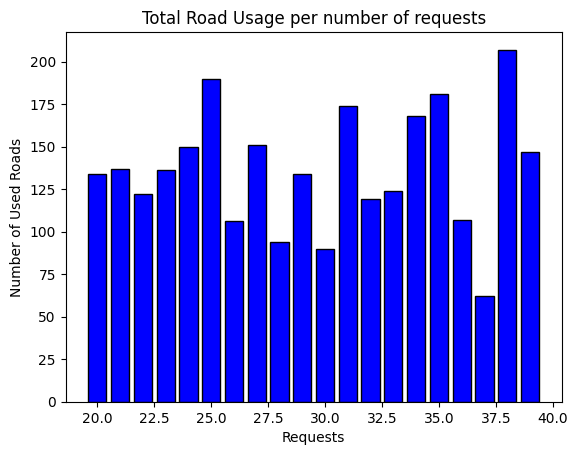

In [119]:
import matplotlib.pyplot as plt


y_values = list(road_df[road_df.columns[1:]].sum(axis=0).astype(int))
x_values = number_of_requests
plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Customize labels and title
plt.xlabel('Requests')
plt.ylabel('Number of Used Roads')
plt.title('Total Road Usage per number of requests')

# Show plot
plt.show()


In [117]:
y_values = list(road_df[road_df.columns[1:]].sum(axis=0).astype(int))

In [115]:
y_values

[134,
 137,
 122,
 136,
 150,
 190,
 106,
 151,
 94,
 134,
 90,
 174,
 119,
 124,
 168,
 181,
 107,
 62,
 207,
 147]